In [50]:
from utils import utils
import cv2 as cv
import numpy as np
import torch
from matplotlib import pyplot as plt
import os
from torchvision import transforms

content_img_path = "content.png"
style_img_path = "style.jpg"

In [2]:
content_img = utils.load_image(content_img_path)
style_img = utils.load_image(style_img_path)

In [14]:
content_img = cv.imread(content_img_path)
content_img = cv.cvtColor(content_img, cv.COLOR_BGR2RGB)
content_img = content_img.astype(np.float32)
content_img.shape

(384, 512, 3)

In [26]:
content_tensor = torch.tensor(content_img)
print(content_tensor.size())
content_tensor = content_tensor.unsqueeze(0)
print(content_tensor.size())
content_tensor.dtype

torch.Size([384, 512, 3])
torch.Size([1, 384, 512, 3])


torch.float32

In [28]:
gaussian_noise = np.random.normal(loc=0, scale=90., size=content_tensor.shape).astype(np.float32)
gaussian_noise = torch.from_numpy(gaussian_noise)
gaussian_noise.dtype

torch.float32

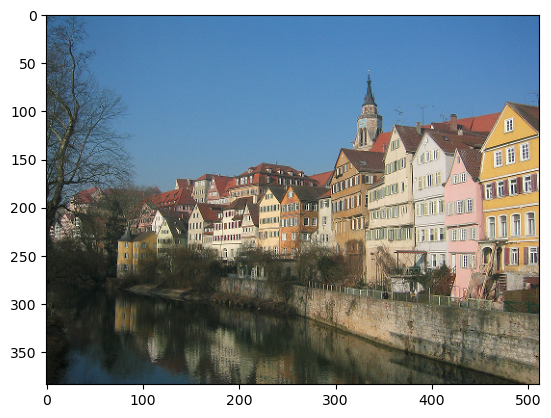

In [31]:
plt.imshow(content_img.astype(np.uint8))

In [33]:
from models import vgg_nets

In [35]:
neural_net = vgg_nets.Vgg16()
content_feature_maps = neural_net(content_tensor)

content_feature_maps

RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[1, 384, 512, 3] to have 3 channels, but got 384 channels instead

In [54]:
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

In [75]:
def loader(img_path, target_shape=None):
    if not os.path.exists(img_path):
        raise Exception(f'Path does not exist: {img_path}')
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255)),
        transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD)
    ])

    img = transform(img).unsqueeze(0)

    return img

img = loader(content_img_path)
img.shape

torch.Size([1, 3, 384, 512])

In [76]:
neural_net_eval = vgg_nets.Vgg16().eval()
neural_net = vgg_nets.Vgg16()
eval_maps = neural_net_eval(img)
maps = neural_net(img)


In [79]:
eval_maps - maps

TypeError: unsupported operand type(s) for -: 'VggOutputs' and 'VggOutputs'